In [1]:
import pandas as pd

1. Data Merging Basics
 tables=Dataframe,
 Merging=Joining
 #In inner join u can have: One to One, One to many and many to many relationships.

In [2]:
#Let's get the ward and census data on which we will perform joins and check
ward_data={'ward':[1,2,3,4,5,3],'Name':['Proco','Brian','Pat','William','Leslie','Nina'],'zip':[60647,60648,60649,60650,60651,60652]}
census_data={'ward':[1,2,3,4,3,6],'pop':[3,4,5,6,7,8],'Name':['Senha','Sneha','Pinky','lucky','April','Lucy']}

In [3]:
ward_dataframe=pd.DataFrame(ward_data)
ward_dataframe

,ward,Name,zip
0,1,Proco,60647
1,2,Brian,60648
2,3,Pat,60649
3,4,William,60650
4,5,Leslie,60651
5,3,Nina,60652


In [4]:
census_dataframe=pd.DataFrame(census_data)
census_dataframe

,ward,pop,Name
0,1,3,Senha
1,2,4,Sneha
2,3,5,Pinky
3,4,6,lucky
4,3,7,April
5,6,8,Lucy


In [83]:
#1.1 Inner Join 
#cross join happen when the primary key is duplicated in both
#the wards which are present in both are displayed in the merge result.
#_x means from left table and _y from right table
#to avoid multiple columns with the same name, they are given suffix automatically by the merge method
wards_census=ward_dataframe.merge(census_dataframe, on='ward')
wards_census

,ward,Name_x,zip,pop,Name_y
0,1,Proco,60647,3,Senha
1,2,Brian,60648,4,Sneha
2,3,Pat,60649,5,Pinky
3,3,Pat,60649,7,April
4,3,Nina,60652,5,Pinky
5,3,Nina,60652,7,April
6,4,William,60650,6,lucky


In [98]:
#to change the suffixes
wards_census=ward_dataframe.merge(census_dataframe, on='ward',suffixes=('_ward','_cen'))
wards_census

,ward,Name_ward,zip,pop,Name_cen
0,1,Proco,60647,3,Senha
1,2,Brian,60648,4,Sneha
2,3,Pat,60649,5,Pinky
3,3,Pat,60649,7,April
4,3,Nina,60652,5,Pinky
5,3,Nina,60652,7,April
6,4,William,60650,6,lucky


In [46]:
#to print the column names
wards_census.columns

Index(['ward', 'Name_ward', 'zip', 'pop', 'Name_cen'], dtype='object')

In [47]:
#To find the number of rows returned
# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (7, 5)


In [ ]:
#a. Group the results by title then count the number of accounts for that title
#counted_df = licenses_owners.groupby('title')["account"].agg({'account':'count'})

# b.Sort the counted_df in desending order
#sorted_df = counted_df.sort_values(by='account', ascending=False)



In [60]:
counted_df=wards_census.groupby('ward')['Name_ward'].agg('count').reset_index()
counted_df
#so the above code basically groups by the ward and tells its total number.

,ward,Name_ward
0,1,1
1,2,1
2,3,4
3,4,1


In [66]:
# Sort the counted_df in desending order
sorted_df=counted_df.sort_values(by='Name_ward',ascending=False)
sorted_df

,ward,Name_ward
2,3,4
0,1,1
1,2,1
3,4,1


In [101]:
wards_census

,ward,Name_ward,zip,pop,Name_cen
0,1,Proco,60647,3,Senha
1,2,Brian,60648,4,Sneha
2,3,Pat,60649,5,Pinky
3,3,Pat,60649,7,April
4,3,Nina,60652,5,Pinky
5,3,Nina,60652,7,April
6,4,William,60650,6,lucky


<function matplotlib.pyplot.show(close=None, block=None)>

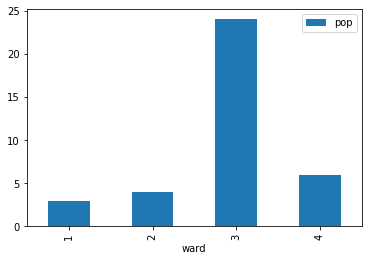

In [107]:
import matplotlib.pyplot as plt
wards_census.groupby('ward').agg('sum').plot(kind='bar',y='pop')
plt.show
#so here, it is grouping by ward and taking sum of 'pop' column.

In [ ]:
# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

In [114]:
wards_census

,ward,Name_ward,zip,pop,Name_cen
0,1,Proco,60647,3,Senha
1,2,Brian,60648,4,Sneha
2,3,Pat,60649,5,Pinky
3,3,Pat,60649,7,April
4,3,Nina,60652,5,Pinky
5,3,Nina,60652,7,April
6,4,William,60650,6,lucky


In [118]:
#Print the results(group by) by ward and show median pop
print(wards_census.groupby('ward').agg({'pop':'median'}))

      pop
ward     
1       3
2       4
3       6
4       6


In [72]:
print(wards_census.loc[wards_census['Name_ward']=='Nina',['ward','Name_ward','zip','pop']])
#.loc[row,column]
#above we have specified .loc(condition for row,column_names)

   ward Name_ward    zip  pop
4     3      Nina  60652    5
5     3      Nina  60652    7


In [89]:
#1.2 MERGING ON MULTIPLE COLUMNS for wards and census table
#It will choose and look at both the values before merging, check the example below:-
ward_list1={'id':[1,2,3,4],'Name':['Pat','Neha','Nina','Tina']}
census_list1={'id':[1,2,3,4],'Name':['Pat','Sneha','Leh','Pina']}
ward_frame=pd.DataFrame(ward_list1)
census_frame=pd.DataFrame(census_list1)
wards_census1=ward_frame.merge(census_frame, on=['id','Name'])
wards_census1


,id,Name
0,1,Pat


In [110]:
#MERGING ON MULTIPLE TABLES
merged_multiple=ward_frame.merge(census_frame, on=['id','Name']) \
                           .merge(ward_dataframe, on='Name',suffixes=('_left','_right'))
merged_multiple

#ERROR WHEN: the column has to be present in both the tables otherwise keyword error it throws.

,id,Name,ward,zip
0,1,Pat,3,60649


In [92]:
ward_dataframe

,ward,Name,zip
0,1,Proco,60647
1,2,Brian,60648
2,3,Pat,60649
3,4,William,60650
4,5,Leslie,60651
5,3,Nina,60652


#NOTE:-So above we have use group by and then sorted the values in descending order and you can use head() method to do the analysis for rows at the top

3. Advanced Merging and Concatenating

In [2]:
#first dictionary
data1={'Name':['Ena','Mina','Dika','Chin','Chong'],'Pid':[0,1,2,3,3],'id':[101,202,303,404,303]}

In [3]:
#second dictionary
data2={'Pid':[2,3,6,7,8,9,10],'id':[202,516,787,909,456,843,897]}

In [5]:
#convert into pandas dataframe
df1=pd.DataFrame(data1)

In [6]:
df2=pd.DataFrame(data2)

In [9]:
df1

,Name,Pid,id
0,Ena,0,101
1,Mina,1,202
2,Dika,2,303
3,Chin,3,404
4,Chong,3,303


In [10]:
df2

,Pid,id
0,2,202
1,3,516
2,6,787
3,7,909
4,8,456
5,9,843
6,10,897


In [11]:
# Concatenate the df1 and df2 tables vertically
concatenated=pd.concat([df1,df2],ignore_index=True)

In [12]:
concatenated

,Name,Pid,id
0,Ena,0,101
1,Mina,1,202
2,Dika,2,303
3,Chin,3,404
4,Chong,3,303
5,NaN,2,202
6,NaN,3,516
7,NaN,6,787
8,NaN,7,909
9,NaN,8,456


In [13]:
# Concatenate the df1 and df2 tables with ignore_index=False
concatenated1=pd.concat([df1,df2],ignore_index=False)


In [14]:
concatenated1

,Name,Pid,id
0,Ena,0,101
1,Mina,1,202
2,Dika,2,303
3,Chin,3,404
4,Chong,3,303
0,NaN,2,202
1,NaN,3,516
2,NaN,6,787
3,NaN,7,909
4,NaN,8,456


In [15]:
#let's check if the column name is different
data3={'Name_id':[2,3,6,7,8,9,10],'product_id':[202,516,787,909,456,843,897]}

In [18]:
df3=pd.DataFrame(data3)

In [21]:
#concatenate
concatenated4=pd.concat([df1,df3],ignore_index=True)
concatenated4
#as u can see if the column name is different, it is concatenated differently.

,Name,Pid,id,Name_id,product_id
0,Ena,0.0,101.0,NaN,NaN
1,Mina,1.0,202.0,NaN,NaN
2,Dika,2.0,303.0,NaN,NaN
3,Chin,3.0,404.0,NaN,NaN
4,Chong,3.0,303.0,NaN,NaN
5,NaN,NaN,NaN,2.0,202.0
6,NaN,NaN,NaN,3.0,516.0
7,NaN,NaN,NaN,6.0,787.0
8,NaN,NaN,NaN,7.0,909.0
9,NaN,NaN,NaN,8.0,456.0


2. Merging tables with different join types

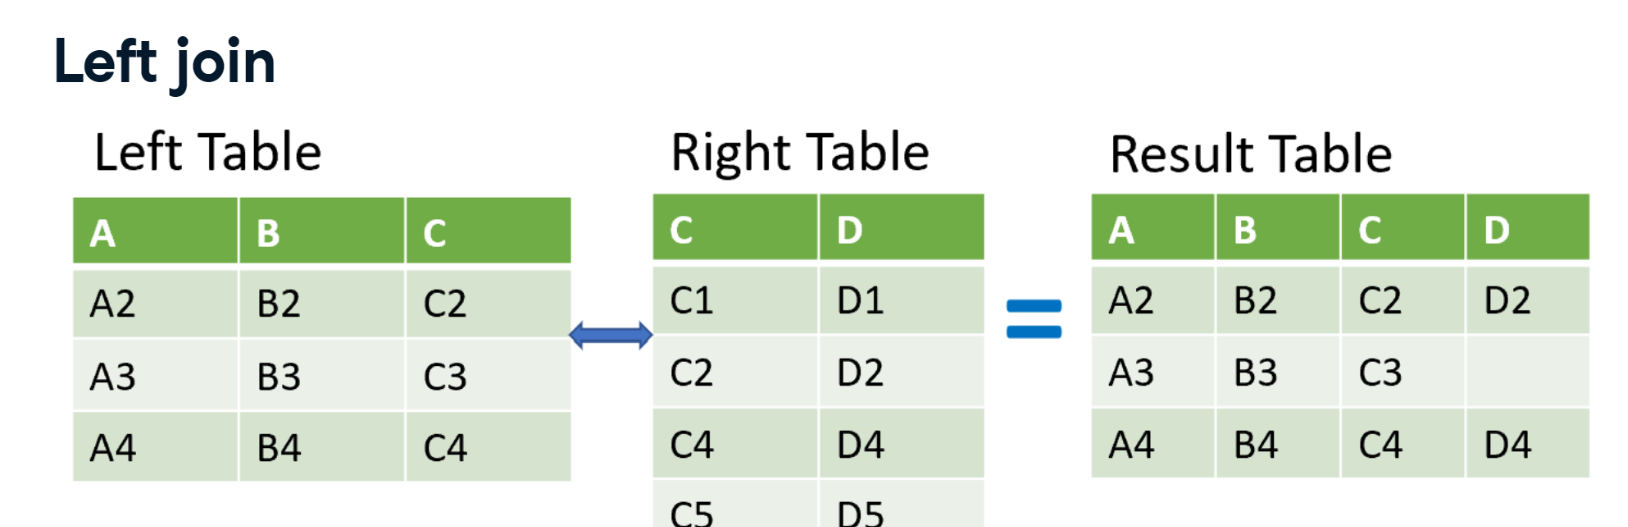


In [127]:
movies_list={'id':[1,2,3,3,4],'Name':['name1', 'name2', 'name3', 'name4','name5']}

In [128]:
movies_frame=pd.DataFrame(movies_list)

In [129]:
movies_frame

,id,Name
0,1,name1
1,2,name2
2,3,name3
3,3,name4
4,4,name5


In [130]:
tagline_list={'id':[1,7,3,3,5],'tagline':['tag1','tag2','tag3','tag4','tag5']}

In [131]:
tagline_frame=pd.DataFrame(tagline_list)

In [132]:
tagline_frame

,id,tagline
0,1,tag1
1,7,tag2
2,3,tag3
3,3,tag4
4,5,tag5


In [134]:
left_join_frame=movies_frame.merge(tagline_frame, how='left', on='id')
left_join_frame
#Just check how cross joins has happened for 3

,id,Name,tagline
0,1,name1,tag1
1,2,name2,NaN
2,3,name3,tag3
3,3,name3,tag4
4,3,name4,tag3
5,3,name4,tag4
6,4,name5,NaN


In [135]:
# Count the number of genres
##genre_count = genres_movies.groupby('genre').agg({'id':'count'})

In [137]:
#Count the number of Name
name_count=left_join_frame.groupby('Name').agg({'id':'count'})
name_count


,id
Name,
name1,1
name2,1
name3,2
name4,2
name5,1


In [ ]:
# Plot a bar chart of the genre_count
#genre_count.plot(kind='bar')
#plt.show()

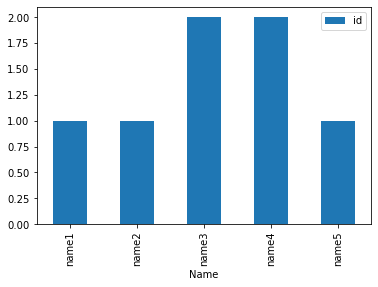

In [138]:
#plot a bar chart of the name_count
name_count.plot(kind='bar')
plt.show()

In [ ]:
# Create an index that returns true if name_1 or name_2 are null
##m = ((iron_1_and_2['name_1'].isnull()) | 
##     (iron_1_and_2['name_2'].isnull()))

In [139]:
#Create an index that returns true if 'Name' or 'Tagline' are null
m=( (left_join_frame['Name'].isnull())|(left_join_frame['tagline'].isnull()) )

In [142]:
#Either print head or full frame or you can merge above in one statement as well.
print(left_join_frame[m])
#see here all columns get displayed depending on the condition for left_join_frame dataframe.

   id   Name tagline
1   2  name2     NaN
6   4  name5     NaN


NOTE: Only in one to one merge the left table will return the same number of rows as the left table.
* the NaN in python is used to denote the missing data.

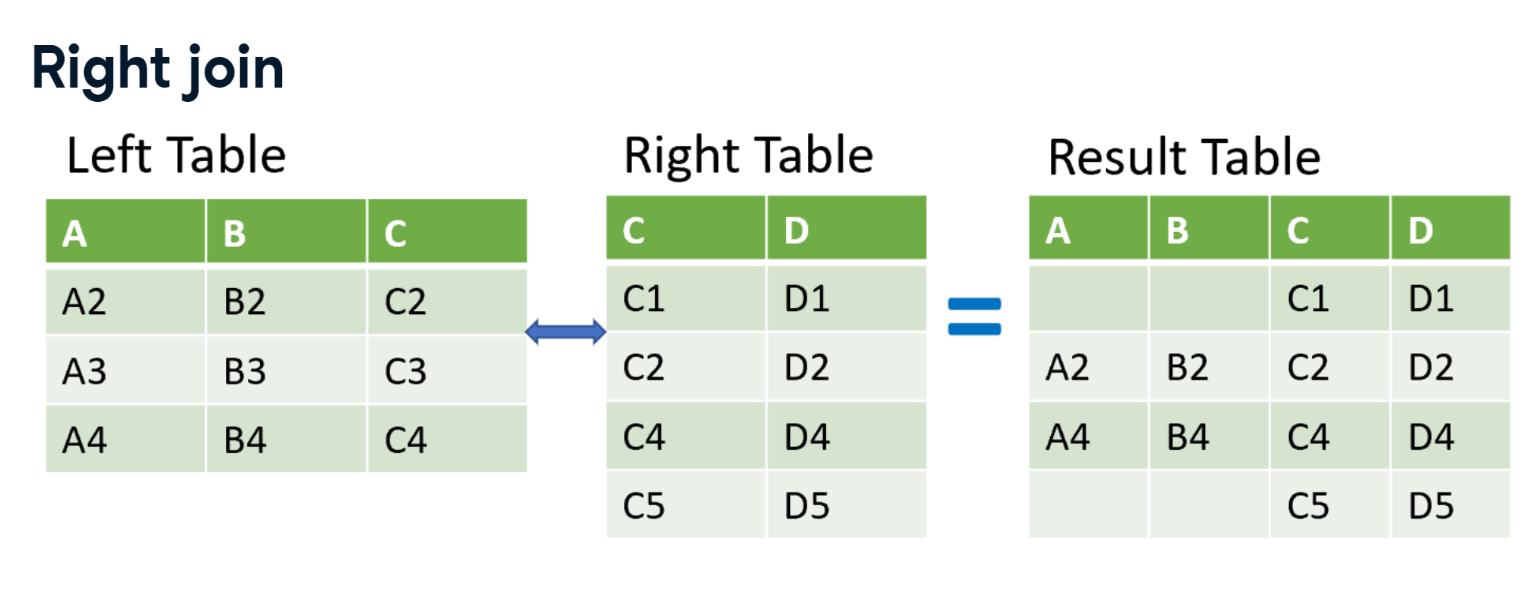

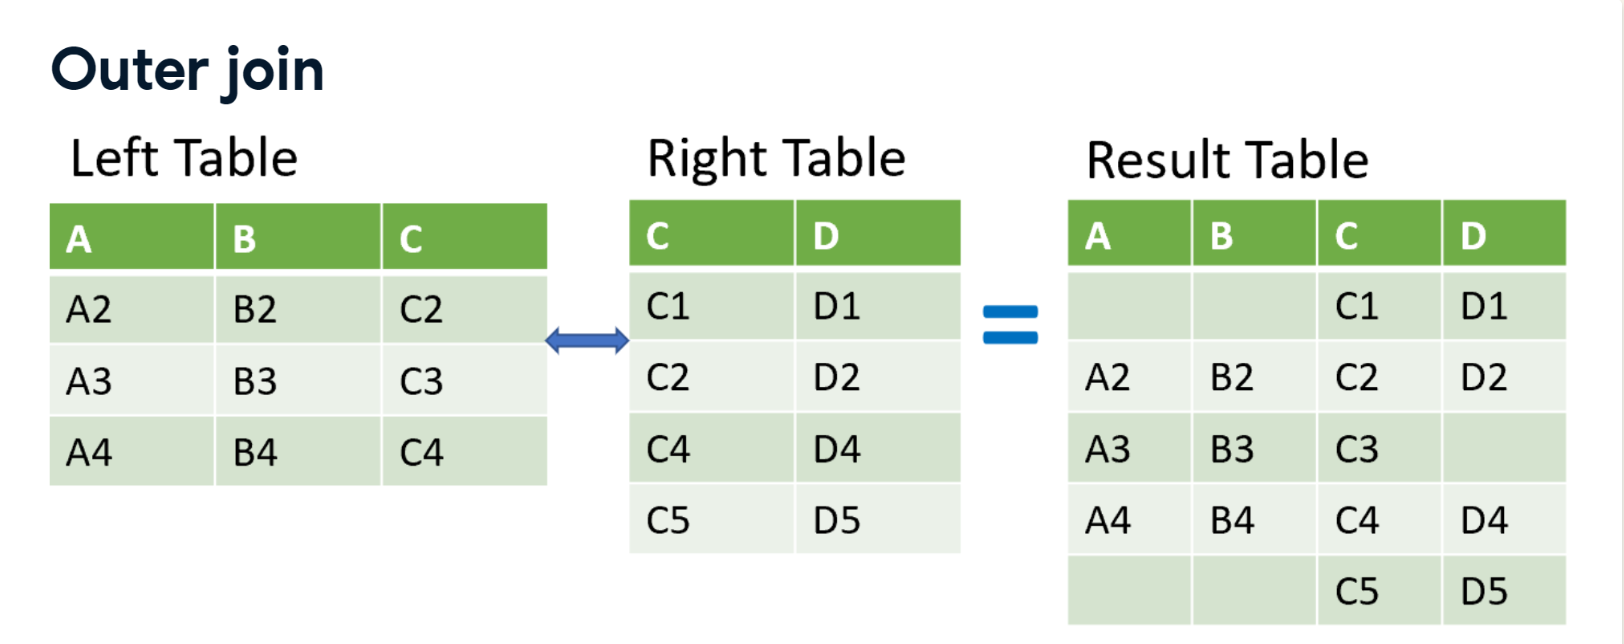

In [145]:
# SAMPLE CODE FOR INNER JOIN: Merge the crews table to itself
   ##crews_self_merged = crews.merge(crews, on='id', how='inner',
   ##                             suffixes=('_dir','_crew'))

In [146]:
#To set an index while importing from the csv file
##movie_frame=pd.read_csv(r"filepath/filename.csv',index_col=['id'])


In [ ]:
#to read csv with multiindex datasets
##movie_frame=pd.read_csv(r"filepath/filename.csv',index_col=['id1','id2'])

# 3. Advanced Joins and concatenating



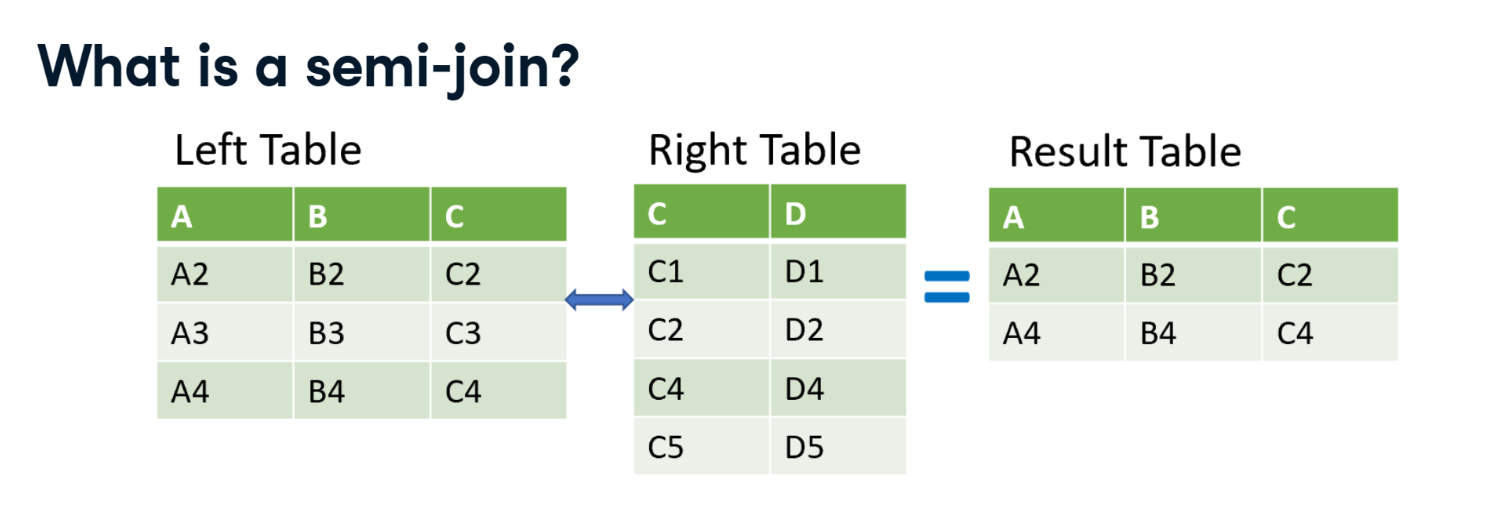
Also, no duplicate data is returned.

In [10]:
#3.1 Semi-Join
#so basically it will display data from the left table and even for one to many relationships, the data will be displayed just once from left table
ward_dataframe

,ward,Name,zip
0,1,Proco,60647
1,2,Brian,60648
2,3,Pat,60649
3,4,William,60650
4,5,Leslie,60651
5,3,Nina,60652


In [9]:
census_dataframe

,ward,pop,Name
0,1,3,Senha
1,2,4,Sneha
2,3,5,Pinky
3,4,6,lucky
4,3,7,April
5,6,8,Lucy


In [5]:
#semi join code below
#we have seen a complex case of many to many below
census_wards=ward_dataframe.merge(census_dataframe, on='ward')
top_wards=ward_dataframe[ward_dataframe['ward'].isin(census_dataframe['ward'])]
print(top_wards)


   ward     Name    zip
0     1    Proco  60647
1     2    Brian  60648
2     3      Pat  60649
3     4  William  60650
5     3     Nina  60652


In [6]:
display(top_wards)

,ward,Name,zip
0,1,Proco,60647
1,2,Brian,60648
2,3,Pat,60649
3,4,William,60650
5,3,Nina,60652


In [7]:
ward_dataframe

,ward,Name,zip
0,1,Proco,60647
1,2,Brian,60648
2,3,Pat,60649
3,4,William,60650
4,5,Leslie,60651
5,3,Nina,60652


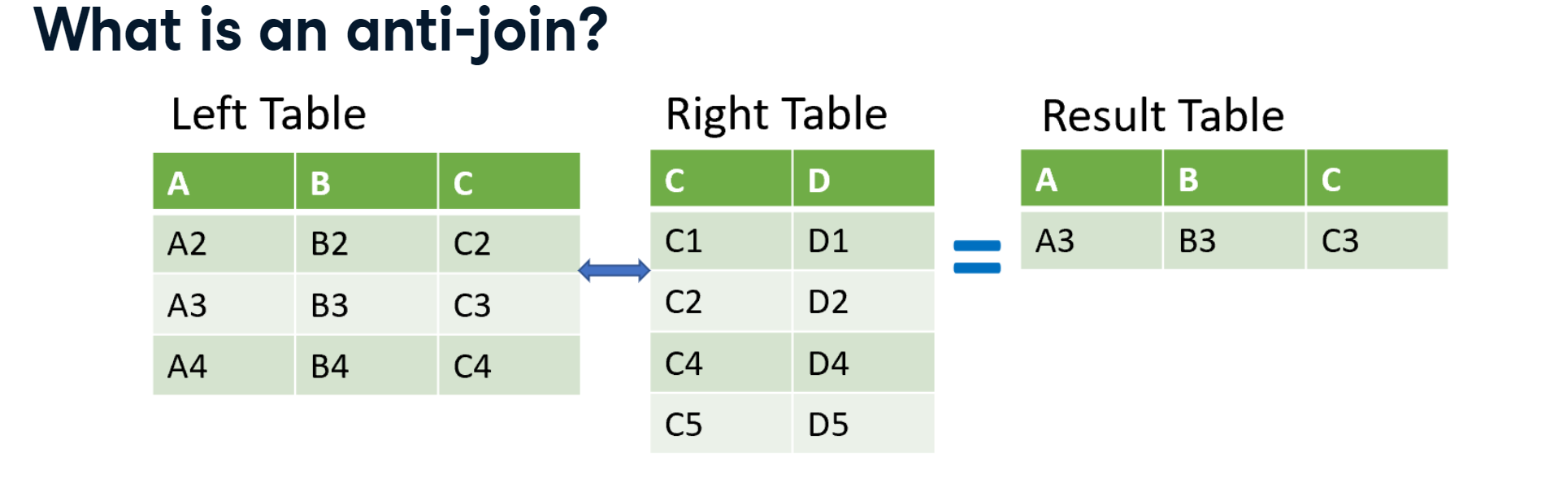

In [10]:
#For ANTI JOIN
# STEP 1: Use left join returning all of the rows from the left table
census_dataframe

,ward,pop,Name
0,1,3,Senha
1,2,4,Sneha
2,3,5,Pinky
3,4,6,lucky
4,3,7,April
5,6,8,Lucy


In [11]:
ward_dataframe

,ward,Name,zip
0,1,Proco,60647
1,2,Brian,60648
2,3,Pat,60649
3,4,William,60650
4,5,Leslie,60651
5,3,Nina,60652


In [12]:
merged_frame=census_dataframe.merge(ward_dataframe,on='ward', how='left',indicator=True)
#Indicator tells from which source it actually came

In [13]:
merged_frame

,ward,pop,Name_x,Name_y,zip,_merge
0,1,3,Senha,Proco,60647.0,both
1,2,4,Sneha,Brian,60648.0,both
2,3,5,Pinky,Pat,60649.0,both
3,3,5,Pinky,Nina,60652.0,both
4,4,6,lucky,William,60650.0,both
5,3,7,April,Pat,60649.0,both
6,3,7,April,Nina,60652.0,both
7,6,8,Lucy,NaN,NaN,left_only


In [14]:
#step 2:
#lets get a list which are just part of left_only
ward_list=merged_frame.loc[merged_frame['_merge']=='left_only','ward']
print(ward_list)

7    6
Name: ward, dtype: int64


In [16]:
#step 3: lets show the data
#As we want to show the entire left table data only thats why passing the list as below
anti_join=census_dataframe[census_dataframe['ward'].isin(ward_list)]
anti_join

,ward,pop,Name
5,6,8,Lucy


In [19]:
employees={'srid':[1,2,3,4,5],'fname':['Siri','Niri','Tina','Pina','Nina']}
top_cust={'cid':[1,2,3,4,5],'srid':[3,3,4,5,5],'fname':['Tina','Tina','Pina','Nina','Nina']}



In [20]:
employees_dataframe=pd.DataFrame(employees)
topcust_dataframe=pd.DataFrame(top_cust)

In [21]:
employees_dataframe

,srid,fname
0,1,Siri
1,2,Niri
2,3,Tina
3,4,Pina
4,5,Nina


In [22]:
topcust_dataframe

,cid,srid,fname
0,1,3,Tina
1,2,3,Tina
2,3,4,Pina
3,4,5,Nina
4,5,5,Nina


In [23]:
#so now we want employees which are not employed basically
#we are going to achieve that by anti join
#step 1 for anti join
merged_frame1=employees_dataframe.merge(topcust_dataframe, on='srid',how='left', indicator=True)
merged_frame1

,srid,fname_x,cid,fname_y,_merge
0,1,Siri,NaN,NaN,left_only
1,2,Niri,NaN,NaN,left_only
2,3,Tina,1.0,Tina,both
3,3,Tina,2.0,Tina,both
4,4,Pina,3.0,Pina,both
5,5,Nina,4.0,Nina,both
6,5,Nina,5.0,Nina,both


In [24]:
#step 2 for anti join
srid_list=merged_frame1.loc[merged_frame1['_merge']=='left_only','srid']
srid_list

0    1
1    2
Name: srid, dtype: int64

In [25]:
#step3 to get the data from the employee table for employees who are unemployed
unemployed_employees=employees_dataframe[employees_dataframe['srid'].isin(srid_list)]
unemployed_employees

,srid,fname
0,1,Siri
1,2,Niri


In [26]:
#que: why we need semi join, when we can use 'both' _merge type and use isin to achieve the similar result?? Maybe because of duplicacy?

# #Concatenating dataframes together vertically

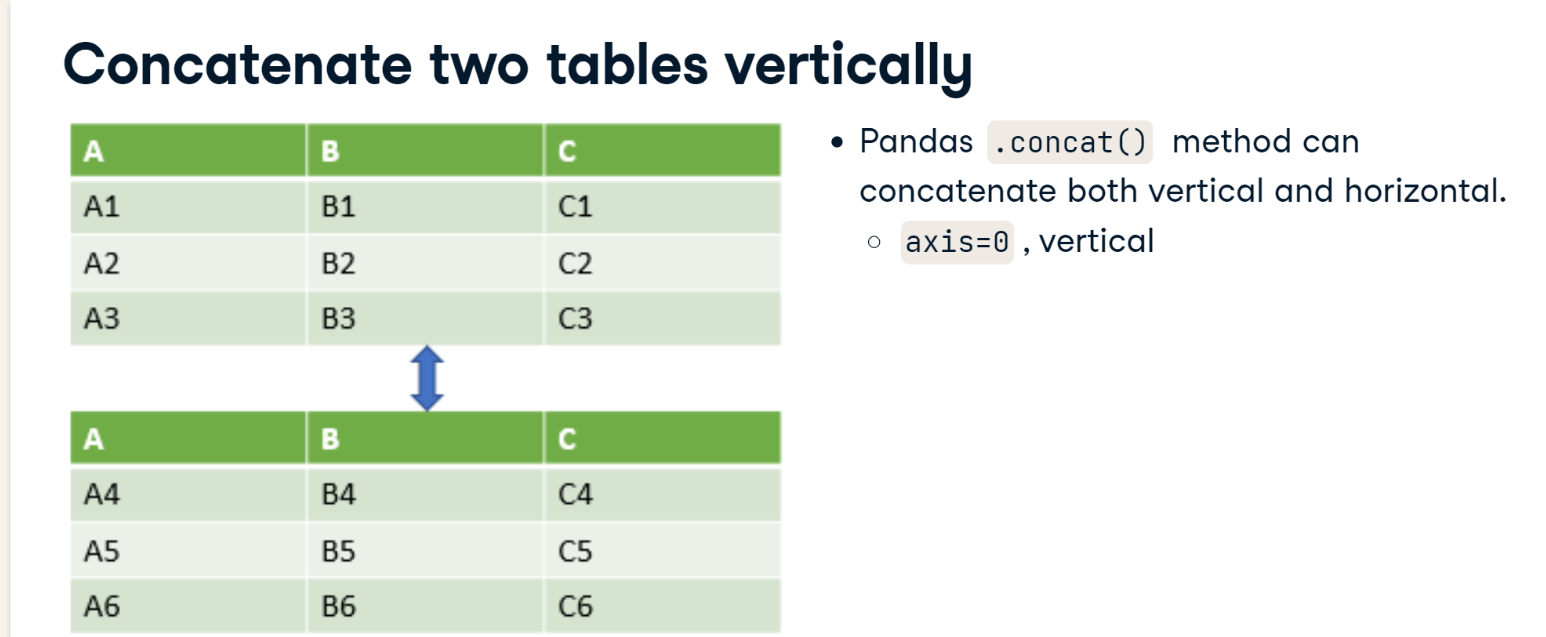

In [27]:
#lets make these above tables

In [28]:
jan={'iid':[1,2,3],'cid':[2,4,8],'invoice_date':['2009-01-01','2009-01-02','2009-01-03'],'total':[1.98,3.96,5.94]}
feb={'iid':[7,8,9],'cid':[38,40,42],'invoice_date':['2009-02-01','2009-02-01','2009-02-02'],'total':[1.98,1.98,3.96]}
mar={'iid':[14,15,16],'cid':[17,19,21],'invoice_date':['2009-03-04','2009-03-04','2009-03-05'],'total':[1.98,1.98,3.96]}


In [29]:
inv_jan=pd.DataFrame(jan)
inv_feb=pd.DataFrame(feb)
inv_mar=pd.DataFrame(mar)

In [30]:
inv_mar

,iid,cid,invoice_date,total
0,14,17,2009-03-04,1.98
1,15,19,2009-03-04,1.98
2,16,21,2009-03-05,3.96


In [31]:
inv_feb

,iid,cid,invoice_date,total
0,7,38,2009-02-01,1.98
1,8,40,2009-02-01,1.98
2,9,42,2009-02-02,3.96


In [32]:
inv_jan

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94


In [33]:
basic_concat=pd.concat([inv_jan,inv_feb,inv_mar])
basic_concat

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
0,7,38,2009-02-01,1.98
1,8,40,2009-02-01,1.98
2,9,42,2009-02-02,3.96
0,14,17,2009-03-04,1.98
1,15,19,2009-03-04,1.98
2,16,21,2009-03-05,3.96


In [34]:
#But here above u can see that the indexing is retained from each individual table.
#If the index doesnt contain any specific information then we can ignore it by choosing ignore_index=true
basic_concat=pd.concat([inv_jan,inv_feb,inv_mar], ignore_index=True)
basic_concat

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,7,38,2009-02-01,1.98
4,8,40,2009-02-01,1.98
5,9,42,2009-02-02,3.96
6,14,17,2009-03-04,1.98
7,15,19,2009-03-04,1.98
8,16,21,2009-03-05,3.96


In [35]:
#In the above, one thing to remember:- you cannot ignore the index and state the keys at the same time.
#so the above case gives us the multiindexing

In [37]:
advance_concat=pd.concat([inv_jan,inv_feb,inv_mar], ignore_index=False, keys=['jan','feb','mar'])
advance_concat

iid  cid invoice_date  total
jan 0    1    2   2009-01-01   1.98
    1    2    4   2009-01-02   3.96
    2    3    8   2009-01-03   5.94
feb 0    7   38   2009-02-01   1.98
    1    8   40   2009-02-01   1.98
    2    9   42   2009-02-02   3.96
mar 0   14   17   2009-03-04   1.98
    1   15   19   2009-03-04   1.98
    2   16   21   2009-03-05   3.96

In [38]:
#NOW THE QUESTION IS WHAT IF THE TABLES HAVE DIFFERENT COLUMN NAMES
#lets set the data first
jan1={'iid':[1,2,3],'cid':[2,4,8],'invoice_date':['2009-01-01','2009-01-02','2009-01-03']}
feb2={'iid':[7,8,9],'cid':[38,40,42],'invoice_date':['2009-02-01','2009-02-01','2009-02-02'],'total':[1.98,1.98,3.96]}

In [39]:
inv_jan1=pd.DataFrame(jan1)
inv_feb2=pd.DataFrame(feb2)


In [40]:
inv_jan1

,iid,cid,invoice_date
0,1,2,2009-01-01
1,2,4,2009-01-02
2,3,8,2009-01-03


In [41]:
inv_feb2

,iid,cid,invoice_date,total
0,7,38,2009-02-01,1.98
1,8,40,2009-02-01,1.98
2,9,42,2009-02-02,3.96


In [42]:
pd.concat([inv_jan1,inv_feb2], sort=True)



,cid,iid,invoice_date,total
0,2,1,2009-01-01,NaN
1,4,2,2009-01-02,NaN
2,8,3,2009-01-03,NaN
0,38,7,2009-02-01,1.98
1,40,8,2009-02-01,1.98
2,42,9,2009-02-02,3.96


In [43]:
#NOW IF WE WANT THE MATCHING COLUMN NAMES IN THE RESULT THEN WE CAN DO BELOW AS:
pd.concat([inv_jan1,inv_feb2], join='inner')

,iid,cid,invoice_date
0,1,2,2009-01-01
1,2,4,2009-01-02
2,3,8,2009-01-03
0,7,38,2009-02-01
1,8,40,2009-02-01
2,9,42,2009-02-02


#A NOTE TO SELF:- point to be seen-> merge is horizontal and concat is vertical.

In [2]:
#question::  what will happen if the column names are different in concatenation.
#maybe rename the column

Let's explore the append() function

In [3]:
group1={'ID':[1,2,3,4,5],'Name':['Car A','Car B','Car C','Car D','Car E']}


In [4]:
dataframe_group1=pd.DataFrame(group1)

In [5]:
group2={'ID':[6,7,8],'Name':['Car F','Car G','Car H']}

In [6]:
dataframe_group2=pd.DataFrame(group2)

In [7]:
dataframe_group1

,ID,Name
0,1,Car A
1,2,Car B
2,3,Car C
3,4,Car D
4,5,Car E


In [8]:
dataframe_group2

,ID,Name
0,6,Car F
1,7,Car G
2,8,Car H


In [11]:
append_function=dataframe_group1.append(dataframe_group2, sort=True)

In [12]:
append_function

,ID,Name
0,1,Car A
1,2,Car B
2,3,Car C
3,4,Car D
4,5,Car E
0,6,Car F
1,7,Car G
2,8,Car H


In [13]:
append_function=dataframe_group1.append(dataframe_group2, sort=True)

In [14]:
append_function
#Que: append is working as concatenation but whats the use of it if concat was there.

,ID,Name
0,1,Car A
1,2,Car B
2,3,Car C
3,4,Car D
4,5,Car E
0,6,Car F
1,7,Car G
2,8,Car H


In [15]:
new_dict={'ID':[1,2,3,4,5],'cat':['A','B','C','C','A']}

In [16]:
new_frame=pd.DataFrame(new_dict)

In [17]:
new_frame

,ID,cat
0,1,A
1,2,B
2,3,C
3,4,C
4,5,A


In [18]:
top_cat=new_frame.groupby('cat').agg({'ID':'sum'})

In [19]:
top_cat

,ID
cat,
A,6
B,2
C,7


In [20]:
#Now lets check the group by with multiple columns
new_dict1={'ID':[1,2,3,4,5],'cat':['A','B','C','C','A'],'Type':['T1','T2','T3','T4','T1']}

In [22]:
new_dict1_frame=pd.DataFrame(new_dict1)

In [26]:
new_dict1_frame

,ID,cat,Type
0,1,A,T1
1,2,B,T2
2,3,C,T3
3,4,C,T4
4,5,A,T1


In [28]:
top_dict1=new_dict1_frame.groupby(['cat','Type']).agg({'ID':'sum'})


In [31]:
top_dict1
#The below is the result how it is shown 

ID
cat Type    
A   T1     6
B   T2     2
C   T3     3
    T4     4

In [33]:
#for sorting values, for multiple values just use ['ID','cat'] etc.
display(new_dict1_frame.sort_values('ID',ascending=False))


,ID,cat,Type
4,5,A,T1
3,4,C,T4
2,3,C,T3
1,2,B,T2
0,1,A,T1


In [2]:
#Validating merges
merge1={'id':[1,2,3,4,5],'category':['A','B','B','C','C']}
merge2={'id':[1,1,2,2,4,5],'category':['AA','BB','CC','DD','DD','AA']}

In [6]:
import pandas as pd
frame1=pd.DataFrame(merge1)
frame2=pd.DataFrame(merge2)
frame1

,id,category
0,1,A
1,2,B
2,3,B
3,4,C
4,5,C


In [8]:
#VALIDATING MERGE
frame2

,id,category
0,1,AA
1,1,BB
2,2,CC
3,2,DD
4,4,DD
5,5,AA


In [10]:
frame1.merge(frame2,on='id',validate='one_to_many')

,id,category_x,category_y
0,1,A,AA
1,1,A,BB
2,2,B,CC
3,2,B,DD
4,4,C,DD
5,5,C,AA


In [ ]:
#Q: Verify integrity argument is also there. Sonno what happens with it.

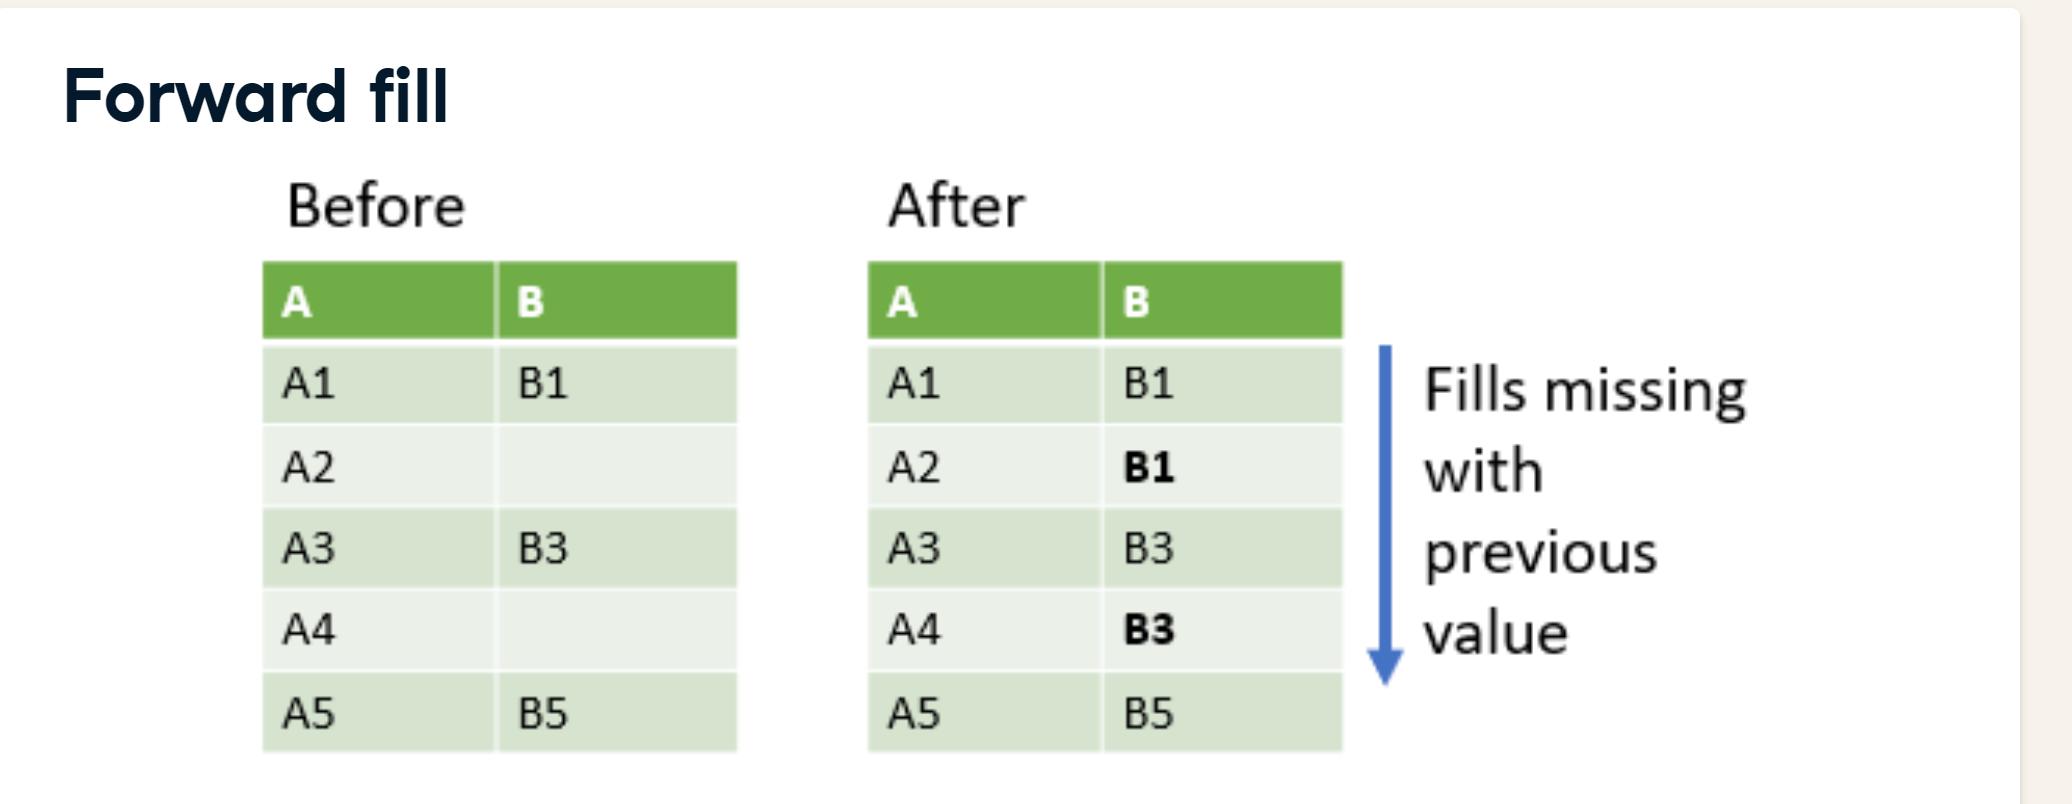

In [12]:
frame1

,id,category
0,1,A
1,2,B
2,3,B
3,4,C
4,5,C


In [13]:
frame2

,id,category
0,1,AA
1,1,BB
2,2,CC
3,2,DD
4,4,DD
5,5,AA


In [21]:
import numpy as np
frame2.loc[2,'category']=np.nan

In [25]:
frame2

,id,category
0,1,AA
1,1,BB
2,2,NaN
3,2,DD
4,4,DD
5,5,AA


In [31]:
#Forward fill for the missing value
pd.merge_ordered(frame1,frame2,on='id',fill_method='ffill',how='right')
#I dont know why but in my case it is not working.

,id,category_x,category_y
0,1,A,AA
1,1,A,BB
2,2,B,NaN
3,2,B,DD
4,4,C,DD
5,5,C,AA


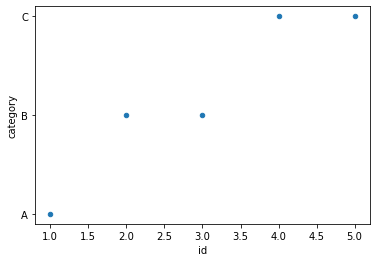

In [37]:
# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
import matplotlib.pyplot as plt
frame1.plot(kind='scatter', x='id', y='category')
plt.show()


In [38]:
dataset={'id':[1,2,3,4,5],'year':['2015','2016','2017','2018','2019'],'population':['2000','3000','4000','5000','6000']}

In [39]:
dataset1=pd.DataFrame(dataset)
dataset1

,id,year,population
0,1,2015,2000
1,2,2016,3000
2,3,2017,4000
3,4,2018,5000
4,5,2019,6000


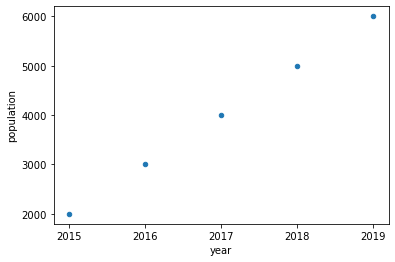

In [40]:
dataset1.plot(kind='scatter',x='year',y='population')
plt.show()

In [42]:
dataset1.query('id>=3')

,id,year,population
2,3,2017,4000
3,4,2018,5000
4,5,2019,6000


In [48]:
# To add column into the dataframe
dataset1['ind']=[11,22,33,44,55]
dataset1

,id,year,population,ind
0,1,2015,2000,11
1,2,2016,3000,22
2,3,2017,4000,33
3,4,2018,5000,44
4,5,2019,6000,55


In [61]:
dataset1['sample_value']=[10,20,30,40,50]
dataset1

,id,year,population,ind,sample_value
0,1,2015,2000,11,10
1,2,2016,3000,22,20
2,3,2017,4000,33,30
3,4,2018,5000,44,40
4,5,2019,6000,55,50


In [63]:
dataset1.query('id>=3')

,id,year,population,ind,sample_value
2,3,2017,4000,33,30
3,4,2018,5000,44,40
4,5,2019,6000,55,50


In [64]:
dataset1.query('year=="2015"')

,id,year,population,ind,sample_value
0,1,2015,2000,11,10


In [66]:
dataset1.query('id>=3 and sample_value>=40')

,id,year,population,ind,sample_value
3,4,2018,5000,44,40
4,5,2019,6000,55,50


In [65]:
dataset1.query('id>=3 or year=="2016"')

,id,year,population,ind,sample_value
1,2,2016,3000,22,20
2,3,2017,4000,33,30
3,4,2018,5000,44,40
4,5,2019,6000,55,50


In [1]:
import pandas as pd

In [4]:
dataset={'id':[1,2,3,4,5],'Category':['Cat A','Cat B','Cat C','Cat D','Cat A'],'month':['jan','feb','mar','apr','may'],'year':[2010,2011,2012,2013,2014]}

In [5]:
dataset1=pd.DataFrame(dataset)

In [6]:
dataset1=pd.DataFrame(dataset)
dataset1

,id,Category,month,year
0,1,Cat A,jan,2010
1,2,Cat B,feb,2011
2,3,Cat C,mar,2012
3,4,Cat D,apr,2013
4,5,Cat A,may,2014


In [17]:
#To find the datatype of series/column in pandas
dataset1.dtypes

id           int64
Category    object
month       object
year        object
dtype: object

In [21]:
#to change data type of year from object to int64

dataset1['year']=dataset1['year'].astype('object')

In [22]:
dataset1.dtypes

id           int64
Category    object
month       object
year        object
dtype: object

In [ ]:
#To rename a column
df.rename(columns={'old_column':'new_column'},inplace=True)